<a href="https://colab.research.google.com/github/mahmodDAHOL/US-accidents/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets folium 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import warnings
from pandas.core.common import SettingWithCopyWarning
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
import numpy as np
from folium.plugins import HeatMap
import folium


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
plt.rcParams['figure.figsize'] = [10, 5]
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahmodaldahool
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 109MB/s]


In [3]:
df = pd.read_csv("/content/us-accidents/US_Accidents_Dec21_updated.csv")

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## Null values

In [6]:
num_of_null = df.isna().sum().sort_values(ascending=False)

### plot number of null values for each variable

<AxesSubplot:>

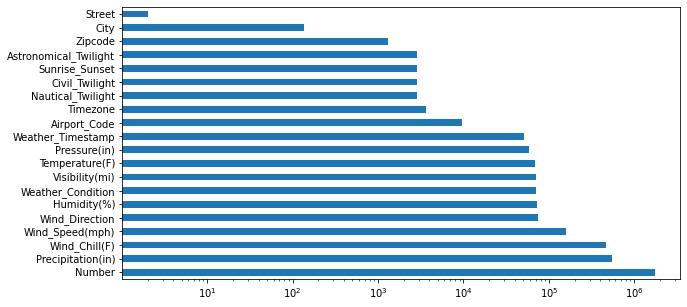

In [7]:
len_of_data = len(df.index)
num_of_null.where(num_of_null>0).dropna().plot(kind="barh", logx=True)

### Remove null values from the DataFrame

In [8]:
df.dropna(how='any', inplace=True)

In [9]:
df.isna().sum().sort_values(ascending=False)

ID                       0
No_Exit                  0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
Railway                  0
Pressure(in)             0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Visibility(mi)           0
Humidity(%)              0
Severity                 0
Street                   0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Side                     0
Wind_Chill(F)            0
C

## Select variables for EDA and show some important statistics

In [10]:
our_df = df[["Severity", "Street", "City", "Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Start_Time"]]
our_df.describe()

,Severity,Temperature(F),Visibility(mi),Wind_Speed(mph),Start_Lat,Start_Lng,End_Lat,End_Lng
count,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000
mean,2.064917,63.833323,9.201041,7.131648,35.069960,-95.102568,35.070232,-95.102271
std,0.380617,18.162256,2.461330,5.412885,5.796634,17.794343,5.796707,17.794098
min,1.000000,-27.000000,0.000000,0.000000,24.566027,-124.517744,24.566013,-124.509263
25%,2.000000,51.000000,10.000000,3.000000,30.229957,-117.833342,30.230194,-117.833756
50%,2.000000,66.000000,10.000000,7.000000,34.976113,-86.136779,34.976497,-86.137776
75%,2.000000,78.000000,10.000000,10.000000,39.232680,-80.359477,39.232687,-80.358917
max,4.000000,196.000000,100.000000,1087.000000,48.996539,-67.484130,48.998144,-67.484130


## this plot show that most of the accidents have a severity 2, where number 4 represents dangerous accidents and 1 represents simple accidents 

<AxesSubplot:>

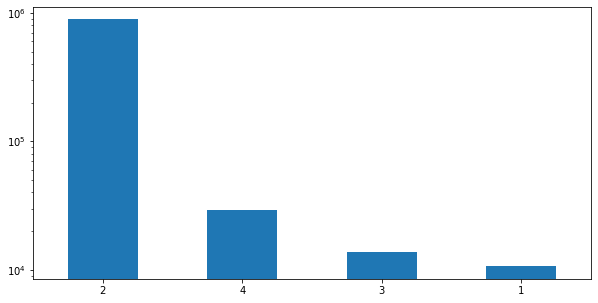

In [11]:
our_df.Severity.value_counts().plot(kind="bar", logy=True, rot=0)

## This pie chart shows proportions of cities that accidents had in, 15.7% of accidents happened in Miami 

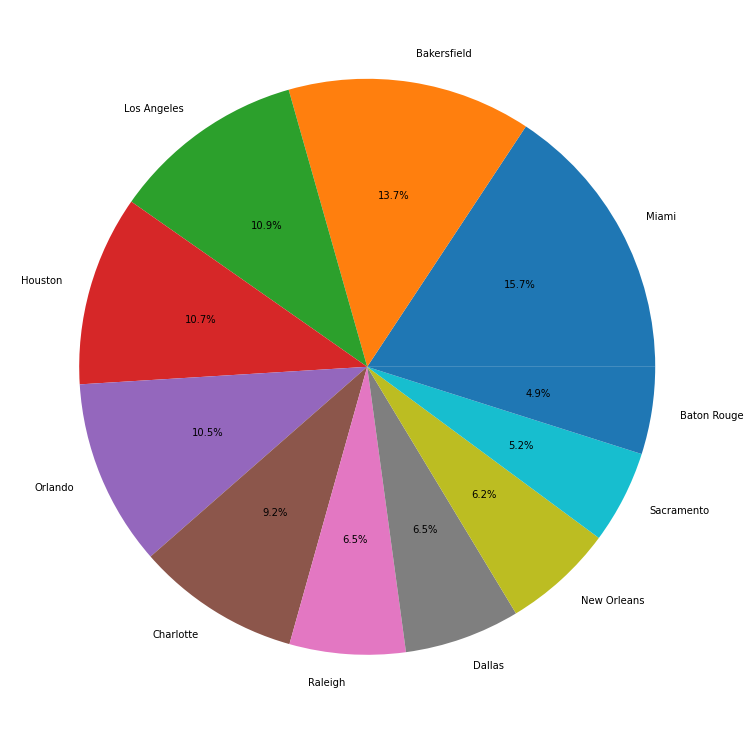

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])

most_acc_cities = {key:value for key, value in our_df.City.value_counts(normalize=True).items() if value > 0.01}
_ = ax.pie(most_acc_cities.values(), labels= most_acc_cities.keys(), autopct='%1.1f%%')

## Make function that takes DataFrame and variables names and return same DataFrame after remove outliers from inputed variables 

In [13]:
def remove_outlier(df:pd.DataFrame, variable_names:List[str]) -> pd.DataFrame:
  for var_name in variable_names:
    q_low = df[var_name].quantile(0.01)
    q_hi  = df[var_name].quantile(0.99)

    df = df[(df[var_name] < q_hi) & (df[var_name] > q_low)]
  return df


## Remove outliers

In [14]:
our_df = remove_outlier(our_df, ["Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)"])

## This histogram shows that most of the accidents happened when the visibility was 8.5 and 7 miles and no accidents when visibility 3.5

<AxesSubplot:ylabel='Frequency'>

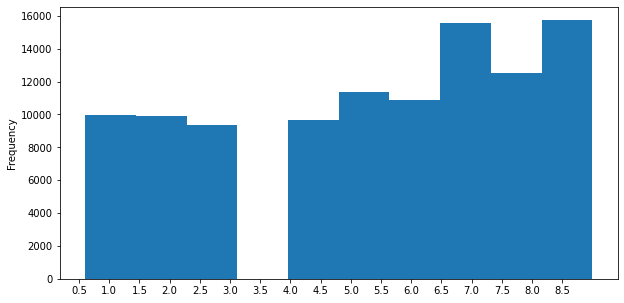

In [39]:
plt.xticks(np.arange(0, 9, 0.5))
our_df["Visibility(mi)"].plot(kind="hist", )

## This histogram shows that most of the accidents happened when temprature is in range [50,75] Fehrenhite 

array([[<AxesSubplot:title={'center':'Temperature(F)'}>]], dtype=object)

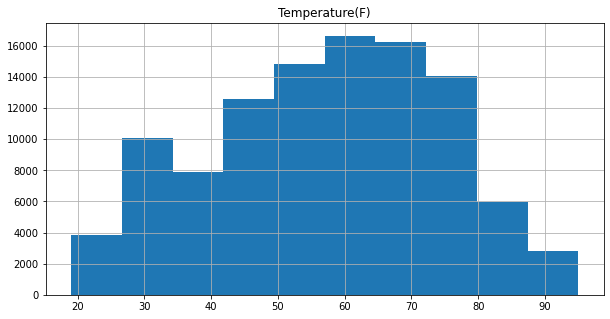

In [16]:
our_df.hist("Temperature(F)")

## This histogram shows that most of the accidents happened when wind speed is in range [6,8] miles per hour 

array([[<AxesSubplot:title={'center':'Wind_Speed(mph)'}>]], dtype=object)

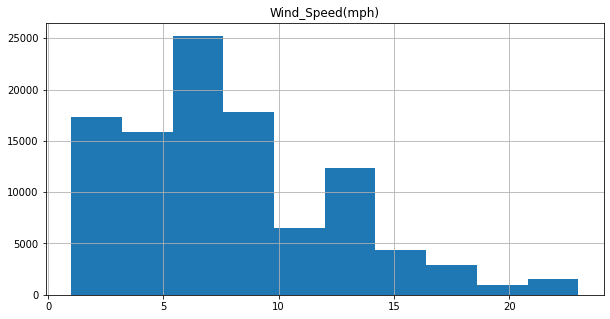

In [41]:
our_df.hist("Wind_Speed(mph)")

## Most of the accidents happened in Highway 101 street

In [18]:
our_df["Street"].value_counts()

 Highway 101             436
 Main St                 302
 S Orange Blossom Trl    293
 Highway 20              212
 NW 27th Ave             202
                        ... 
 E Oakdale Ave             1
 Sunnywood Dr              1
 Abernathy Dr              1
 Rosedale Ln               1
 Hardin Way                1
Name: Street, Length: 29083, dtype: int64

### Make a map to show where the accidents happened

In [19]:
map = folium.Map()
sample_df = our_df.sample(int(0.01*len(our_df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

## The colors represents density of accidents
## Red:a lot
## blue: a littel

In [20]:
HeatMap(lat_lng_pairs).add_to(map)
map

In [21]:
our_df["Start_Time"] = our_df["Start_Time"].astype('datetime64[ns]')


In [22]:
acc_days = our_df["Start_Time"].dt.day
acc_day_of_weeks = our_df["Start_Time"].dt.day_of_week
acc_hours = our_df["Start_Time"].dt.hour
acc_years = our_df["Start_Time"].dt.year
acc_months = our_df["Start_Time"].dt.month

## most of the accidents hapened in last day in the month

<AxesSubplot:ylabel='Frequency'>

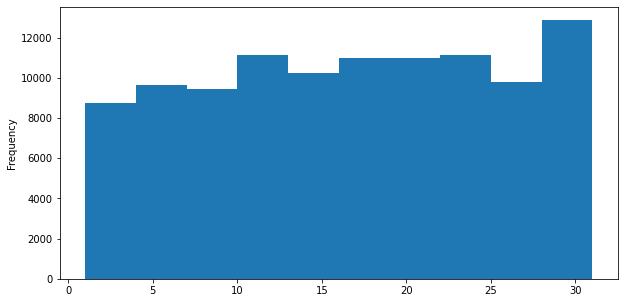

In [23]:
acc_days.plot(kind="hist")

## Most of the accidents happened in wensday

<AxesSubplot:ylabel='Frequency'>

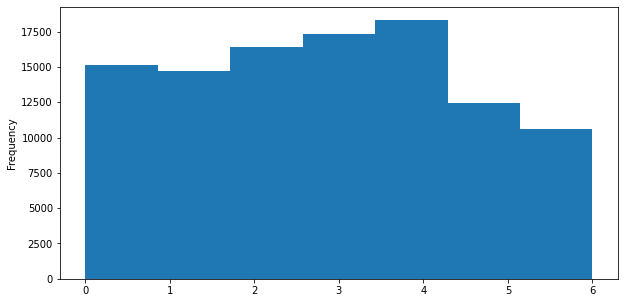

In [24]:
acc_day_of_weeks.plot(kind="hist", bins=7)


## the time of most of the accidents happened in range [1, 5] PM

<AxesSubplot:ylabel='Frequency'>

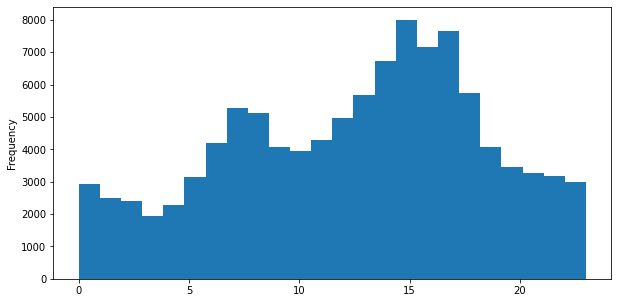

In [25]:
acc_hours.plot(kind="hist", bins=24)


## Number of accidents raise a lot in 2021 reletive to previous years

<AxesSubplot:ylabel='Frequency'>

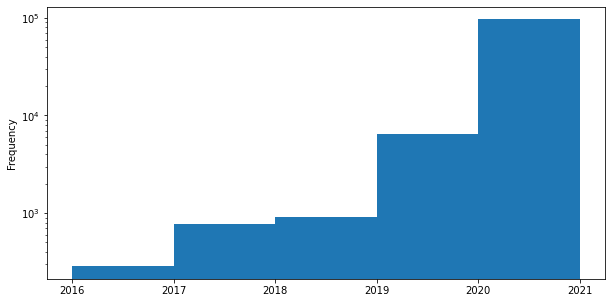

In [26]:
acc_years.plot(kind="hist",bins=5, logy=True)

## Most of the accidents happened in last month of the year

<AxesSubplot:ylabel='Frequency'>

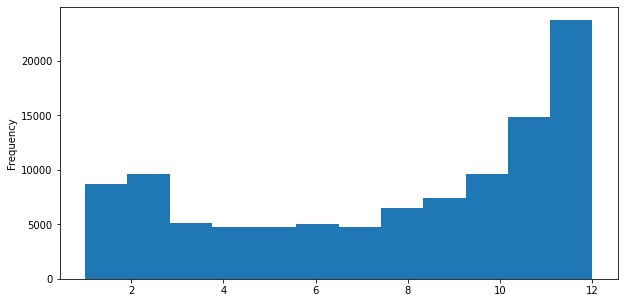

In [27]:
acc_months.plot(kind="hist",bins=12)

## function for calculate the distence between the start position and the end position of the accidents

In [28]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


our_df['dist'] = \
    haversine(our_df.Start_Lat.shift(), our_df.Start_Lng.shift(),
                 our_df.End_Lat, our_df.End_Lat)

<AxesSubplot:ylabel='Frequency'>

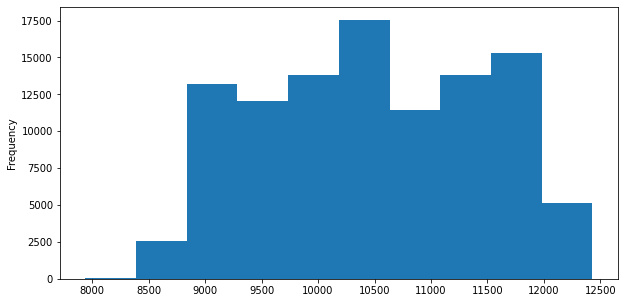

In [29]:
plt.xticks(np.arange(0, 13000, 500))
our_df["dist"].plot(kind="hist")